# <font color='Red'>PCA : Principle Component Analysis </font>
A normal human can not visualize more than 3 dimensions but when we are solving real-life machine learning problems we have to deal with more than 3 dimensions. So the concept of dimensionality reduction came into the picture, PCA is all about reducing higher dimensions to lower so that we can easily analyze the dataset.  So let's apply PCA  on MNIST dataset which is of 784 dimensions. 

### Download Dataset from : https://www.kaggle.com/c/digit-recognizer/data
# <font color='Red'>Data Description</font>
The data files train.csv and test.csv contain grey-scale images of hand-drawn digits, from zero through nine.Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

In [1]:
# Importing useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [2]:
# Dataset is in same folder , direct filename can be given 
# if dataset is at differnt location, provide compelete path
data = pd.read_csv('./MNIST_train.csv')
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# printing shape of dataset
data.shape

(42000, 785)

In [4]:
# MNIST dataset have collection of 42000, 28x28 grey-scale images
# Converting images to vectors we get 748x1 vector
# First 784 values in data in pixel values and last is label
#print(data.columns)
# Store labels into another variable
labels = data['label']
labels.shape
print(" Label is vector of size 42000")

 Label is vector of size 42000


In [5]:
# Remove label columns from dataset
# axis=1 is for column and axis=0 for row
data = data.drop(["label"],axis=1)
print(data.shape)
print("last column ie. Label is removed")
print("data is 42000 rows and 784 features datamatrix")

(42000, 784)
last column ie. Label is removed
data is 42000 rows and 784 features datamatrix


In [6]:
print("Size of Independent data : ",data.shape)
print("Size of dependent data : ",labels.shape)

Size of Independent data :  (42000, 784)
Size of dependent data :  (42000,)


# Let's display few numbers

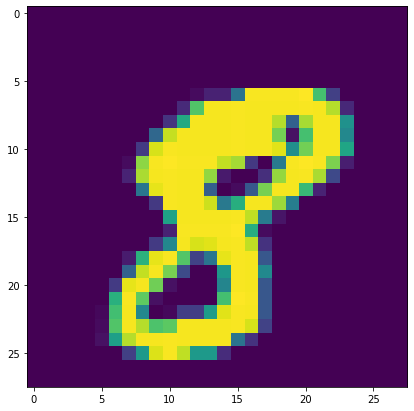

8


In [7]:
plt.figure(figsize=(7,7))
# Change the index values to get differnt results
# index can be from 0 to 41999
index = 10
# Image had been converted to vector, now again reshaping it as 28x28 grid
digit_image = data.iloc[index].as_matrix().reshape(28,28)
plt.imshow(digit_image)
plt.show()
# Printing correct label of the image
print(labels[index])

We have analyzed the MNIST dataset, now let's apply PCA

# <font color='Red'>PCA : Principle Component Analysis </font>
Let's learn PCA now, In PCA our goal is to reduce dimensions from 784-d to 2-d, and we will try to minimize informaion loss.
# <font color='Green'>How PCA works? </font>
<ul>
    <li>Project points from dimensios to lower dimensions, preserve the direction with maximum spread.</li>
    <li>PCA works like ,If we are forced drop any dimension, we will drop one with minimum variability, so that less informations will we lost.</li>
    <li>Standardize the each column, such that data maxtrix is column standardize.</li>
    <li>If we want to reduce dimensions from n-dim to k-dim such that k is less than n, we will find top k directions such that variance of projected data points is maximum.</li>
    <li>We will calculate Co-variance matrix of data points S, and find eigen vector , sort eigen value and corresponding eigen vector, take k eigen vectors corresponding to top k eigen values. These vectors are least correlated, that will the reduces dimensions of our dataset, retaining maximum information.</li>
    <li>Eigen vectors of any linear transformation is a non-zero vector that changes by a constant eigen value, when Linear transformation is applied.</li>
</ul>

# <font color='Blue'>PCA using numpy</font>


In [8]:
# Let's take first 15000 points to understand PCA
sample_labels = labels.head(15000)
sample_data = data.head(15000)
print("Data shape : ",sample_data.shape)
print("Labels shape : ",sample_labels.shape)

Data shape :  (15000, 784)
Labels shape :  (15000,)


# Preprocessing the data

In [9]:
# Column standardization
from sklearn.preprocessing import StandardScaler
sample_data = StandardScaler().fit_transform(sample_data)
sum(sample_data[55]/len(sample_data))

-0.00011557249250166233

In [10]:
# Covariance matxix of X , COV(X)=S=X_transpose.X
cov_matrix = np.matmul(sample_data.T,sample_data)
print(cov_matrix.shape)
print("If sample_data is ( n x d ) then cov_matrix will be square symmetric matric of ( d x d ).")

(784, 784)
If sample_data is ( n x d ) then cov_matrix will be square symmetric matric of ( d x d ).


# We want to project all data points of MNIST dataset into 2-D plot
Taking top 2 eigen value and corresponding eigen vectors,eigen value are in ascending order in numpy that means smallest will be at 0-index and maximum eigen value will be at 733, we want top 2 eigen values, ie: 783 and 782

In [11]:
# Getting top two eigen values
from scipy.linalg import eigh
eigen_values,eigen_vectors = eigh(cov_matrix,eigvals=(782,783))
print("eigen_values : ",eigen_values,"Shape : ",eigen_values.shape)
print("eigen_vectors Shape : ",eigen_vectors.shape)

eigen_values :  [435532.55785282 605719.29173629] Shape :  (2,)
eigen_vectors Shape :  (784, 2)


In [12]:
# Eigen vector is 784 x 2 dimensions, converting it into 2x784 , ie: 2-D vectors
# take transpose
eigen_vectors =  eigen_vectors.T
print(" Eigen_vectors Shape : ",eigen_vectors.shape)
print(" Eigen vector at 0 index is first principal component and at 1-index 2nd Principal component")

 Eigen_vectors Shape :  (2, 784)
 Eigen vector at 0 index is first principal component and at 1-index 2nd Principal component


# Projecting original sample data on the plane of Pricipal component
We can project data points using vector-vector multiplication



In [13]:
# Eigen vector : 2x784
# Sample data : 15000x784
# Transpose Sample data : 784x15000
# new_cordinate = 2x15000
new_coordinate = np.matmul(eigen_vectors,sample_data.T) 
print("New Coordinate : ",new_coordinate.shape)
print("New data has only two principal components")

New Coordinate :  (2, 15000)
New data has only two principal components


# For plotting labeled data, we have to append labels for each data points

In [14]:
print("Label : ",sample_labels.shape,"New Coordinate : ",new_coordinate.shape)
new_coord = np.vstack((new_coordinate,sample_labels))
print("new coordinate shape: ",new_coordinate.shape)
print('We want our data in tabular form, plotting will be easy, taking transpose')
new_coord = new_coord.T
print("Updated new coordinate shape: ",new_coord.shape)
print("We have 15000 rows of data sample ,3 column each")

Label :  (15000,) New Coordinate :  (2, 15000)
new coordinate shape:  (2, 15000)
We want our data in tabular form, plotting will be easy, taking transpose
Updated new coordinate shape:  (15000, 3)
We have 15000 rows of data sample ,3 column each


# Making data frame from numpy array

In [15]:
dataframe = pd.DataFrame(data=new_coord,columns=["1st Pricipal Component","2nd Pricipal Component","Labels"])
dataframe.head()

,1st Pricipal Component,2nd Pricipal Component,Labels
0,-5.558661,-5.043558,1.0
1,6.193635,19.305278,0.0
2,-1.909878,-7.678775,1.0
3,5.525748,-0.464845,4.0
4,6.366527,26.644289,0.0


# Visualizing 784 dimensions in 2 dimensions

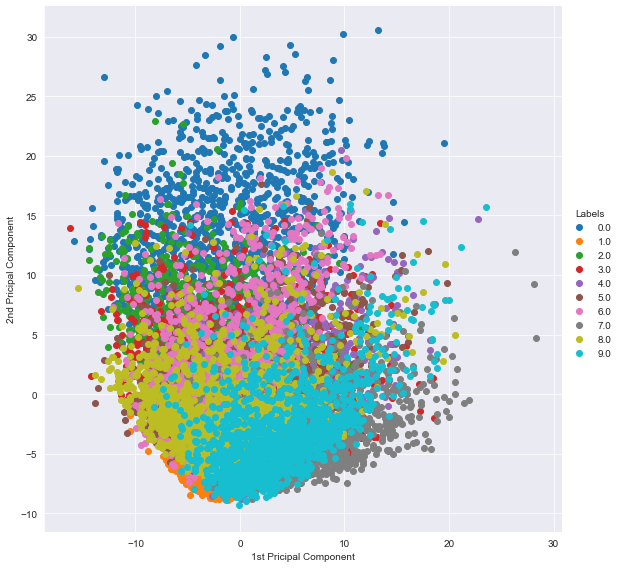

In [16]:
sns.set_style("darkgrid")
sns.FacetGrid(dataframe,hue='Labels',size=8).map(plt.scatter,"1st Pricipal Component","2nd Pricipal Component").add_legend()

# <font color="red">Observations </font>
<ul>
    <li>We have recudes 784 dimensions in 2 dimensions on MNIST dataset</li>
    <li>We can observe all the dark blue(0) and skyblue(9) are clustered together. </li>
    <li>All the remaining labels (1,2,3,4,5,6,7,8) are badly merged together. </li>
    <li>PCA did a good job but it's hard to visualize in 2-d.</li>
</ul>

# <font color="red">PCA : Using Scikit-Learn </font>

In [17]:
from sklearn import decomposition
pca = decomposition.PCA()
# Configuring compenents of PCA
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)
print("Shape of pca_data : ",pca_data.shape)

Shape of pca_data :  (15000, 2)


PCA will internally calculate everything,pca data will store projected data on 2D.

# Adding labels to pca data for visualizations

In [18]:
print("PCA data Shape : ",pca_data.shape,"labels Shape : ",sample_labels.shape)
pca_dataa = np.vstack((pca_data.T,sample_labels)).T
print("Updated pca_data shape : ",pca_dataa.shape)

PCA data Shape :  (15000, 2) labels Shape :  (15000,)
Updated pca_data shape :  (15000, 3)


In [19]:
# Creating dataframe
pca_df = pd.DataFrame(data=pca_dataa,columns=["1st Pricipal Component","2nd Pricipal Component","Labels"])
dataframe.head()

,1st Pricipal Component,2nd Pricipal Component,Labels
0,-5.558661,-5.043558,1.0
1,6.193635,19.305278,0.0
2,-1.909878,-7.678775,1.0
3,5.525748,-0.464845,4.0
4,6.366527,26.644289,0.0


# Visualizing 784 dimensions in 2 dimensions

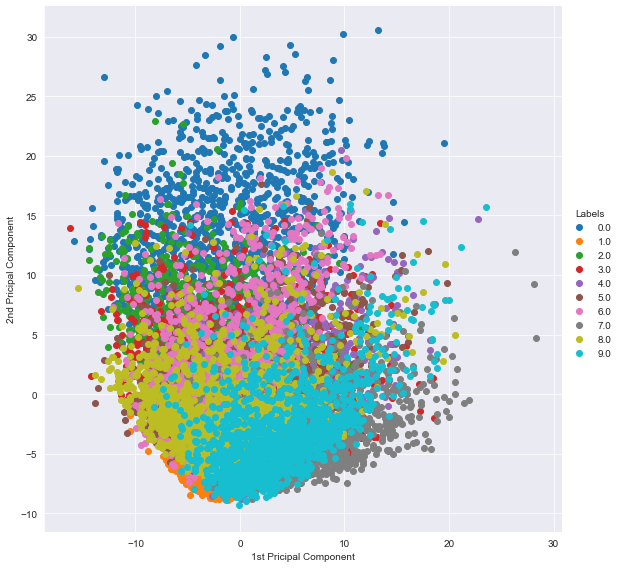

In [20]:
sns.set_style("darkgrid")
sns.FacetGrid(dataframe,hue='Labels',size=8).map(plt.scatter,"1st Pricipal Component","2nd Pricipal Component").add_legend()

# <font color="red">Observations : similar result as previous </font>
<ul>
    <li>We have recudes 784 dimensions in 2 dimensions on MNIST dataset</li>
    <li>We can observe all the dark blue(0) and skyblue(9) are clustered together. </li>
    <li>All the remaining labels (1,2,3,4,5,6,7,8) are badly merged together. </li>
</ul>

# <font color="red">Plot of total variance explained and number of components  </font>

(15000, 784)


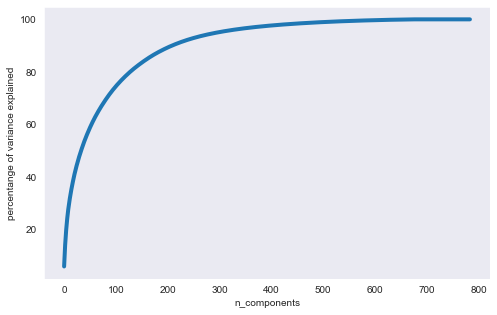

In [21]:
pca.n_components=784
pca_dataset = pca.fit_transform(sample_data)
print(pca_dataset.shape)
percentange_variance_explained = pca.explained_variance_/np.sum(pca.explained_variance_)
cumulative_variance_explained = np.cumsum(percentange_variance_explained*100)
plt.figure(1,figsize=(8,5))
plt.plot(cumulative_variance_explained,linewidth=4)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components') 
plt.ylabel('percentange of variance explained')
plt.show()

# Observations